In [157]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import os
from collections import Counter
from sklearn.cluster import KMeans
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactic, ICRS


#Data file
file = os.chdir("/home/abhi/Desktop/eROSITA/")

#Importing the data and model parameters
data = pd.read_excel("Variables and Transients.xlsx")
data2 = pd.read_csv("parameters.txt").to_numpy()
#.reshape(-1,1)
lum_x = data["Luminosity (ergs/sec)"].dropna().to_numpy().reshape(-1,1)
dist = data["Distance"].dropna().to_numpy().reshape(-1,1)
sr_class = data["Source Class"].dropna().to_numpy()
bp_rp = data["bp_rp"].dropna().to_numpy().reshape(-1,1)
Absolute_G = data["Absolute G"].dropna().to_numpy().reshape(-1,1)
Temp = data["Temp (Kelvin)"].dropna().to_numpy().reshape(-1,1)
o_period= data["Final period"].to_numpy().reshape(-1,1)
lum_o = data["luminosity_GAIA (ergs/sec)"].dropna().to_numpy().reshape(-1,1)
radius = data["RADIUS"].to_numpy().reshape(-1,1)
galac_coord_LA = data["Lattitude"].dropna()
galac_coord_LG = data["Longitude"].dropna()
sr_no = np.linspace(1,746,746)
a1 = data2[:,1].reshape(-1,1)
a2 = data2[:,2].reshape(-1,1)
Ep = data2[:,3].reshape(-1,1)
sr = data2[:,0]


#Checking the shapes
print("lum_x",np.shape(lum_x))
print("lum_o",np.shape(lum_o))
print("dist",np.shape(dist))
print("orbital period",np.shape(o_period))
print("bp-rp",np.shape(bp_rp))
print("Temp", np.shape(Temp))
print("radius", np.shape(radius))
print("Absolute_G", np.shape(Absolute_G))
print("Galactic coordinates", np.shape(galac_coord_LA))
print("Galactic coordinates", np.shape(galac_coord_LG))

#Changing the elements to zero
lum_o[lum_o == "--"] = np.nan
Temp[Temp == "--"] = np.nan
radius[radius == "--"] = np.nan
n = 12
o_period = o_period[:-n]
radius = radius[:-n]

#Checking the length of the array
print(len(radius))
print(len(dist))
print(len(Temp))
print(len(o_period))


#Checking the source class
count = Counter(sr_class)
print(count)

#Class
class_1 = ["SS_IB", "YSO", "IB","IB_ACS", "CV", "LPV", "XRB", "WR", "PSR"]

#Replacing sources by their numbers
sr_class_new = sr_class

sr_class_new[sr_class_new  == "SS_IB"] = 0
sr_class_new[sr_class_new  == "YSO"] = 1
sr_class_new[sr_class_new  == "IB"] = 2
sr_class_new[sr_class_new  == "IB_ACS"] = 3
sr_class_new[sr_class_new  == "CV"] = 4
sr_class_new[sr_class_new  == "LPV"] = 5
sr_class_new[sr_class_new  == "XRB"] = 6
sr_class_new[sr_class_new  == "WR"] = 7
sr_class_new[sr_class_new  == "PSR"] = 8

# Random Forest classification
rf_cl = RandomForestClassifier(n_estimators = 250, class_weight="balanced", random_state=42)
target = np.array(sr_class_new, dtype=int)
sr1 = np.linspace(0,745,746)
target_sr_ = np.column_stack((sr1,target))
target_sr_1 = []

for i in sr:
    match = target_sr_[target_sr_[:,0] == i]
    target_sr_1.append(match[0][1])
    
target_sr_1 = np.array(target_sr_1)

#Data and Standardization
data_1 = np.column_stack((a1,a2,Ep))#,bp_rp,Absolute_G,lum_o,Temp,radius,a1,a2,Ep,galac_coord_LA,galac_coord_LG))#,o_period)) = how to adjust the nan vals
scalar = RobustScaler()
data_1_scaled = scalar.fit_transform(data_1)
# data_1_scaled_clean = data_1_scaled[~np.isnan(data_1_scaled).any(axis=1)]
# target_clean = target[~np.isnan(data_1_scaled).any(axis=1)]

#RF classification
y_rf_cl = rf_cl.fit(data_1,target_sr_1)
print(y_rf_cl)

lum_x (746, 1)
lum_o (746, 1)
dist (746, 1)
orbital period (758, 1)
bp-rp (746, 1)
Temp (746, 1)
radius (758, 1)
Absolute_G (746, 1)
Galactic coordinates (746,)
Galactic coordinates (746,)
746
746
746
746
Counter({'SS_IB': 430, 'YSO': 107, 'IB': 104, 'IB_ACS': 51, 'CV': 37, 'LPV': 12, 'XRB': 3, 'WR': 1, 'PSR': 1})
RandomForestClassifier(class_weight='balanced', n_estimators=250,
                       random_state=42)


In [158]:
#Predict
lum_x_ = 3.28e31
dist_ = 459
bp_rp_ = 1.24
Absolute_G_ = 2.47
lum_o_ = np.nan
Temp_ = 4000
radius_ = np.nan
galac_coord_LA_ = 208
galac_coord_LG_ = -19.1
a1_ = -1.5
a2_ = 2.5
Ep_ = 0.7

source = np.array([[a1_,a2_,Ep_]])#,bp_rp_,Absolute_G_,lum_o_,Temp_,radius_,galac_coord_LA_,galac_coord_LG_]])
source_scaled = scalar.transform(source)

result = y_rf_cl.predict(source)
print("The new source belongs to the class:",class_1[int(result[0])])

The new source belongs to the class: SS_IB


In [89]:
#Classification on the basis of labels 
label = [0,1,2,3,4,5,6,7,8]
data_1_scaled_clean = data_1.T
grouped_data = {label: data_1_scaled_clean[target_sr_1 == label] for label in label}

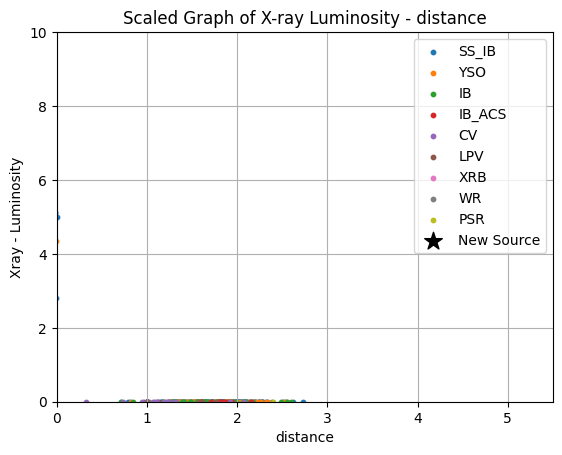

In [145]:
#Plotting 
#plot.scatter(data_1_scaled_clean[0],data_1_scaled_clean[1],s = 10,label = "eROSITA X-ray Sources")

for label, points in grouped_data.items():
    plot.scatter(points[:,0], points[:,1], label = class_1[label], s = 10)
    plot.legend()

plot.scatter(source_scaled[0][0],source_scaled[0][1],marker = "*", color = "black" , s = 175, label = "New Source")
plot.xlabel("distance")
plot.ylabel("Xray - Luminosity")
plot.title("Scaled Graph of X-ray Luminosity - distance")
plot.xlim(0,5.5)
plot.ylim(0,10)
plot.grid()
plot.legend()
#plot.gca().invert_yaxis()
plot.show()

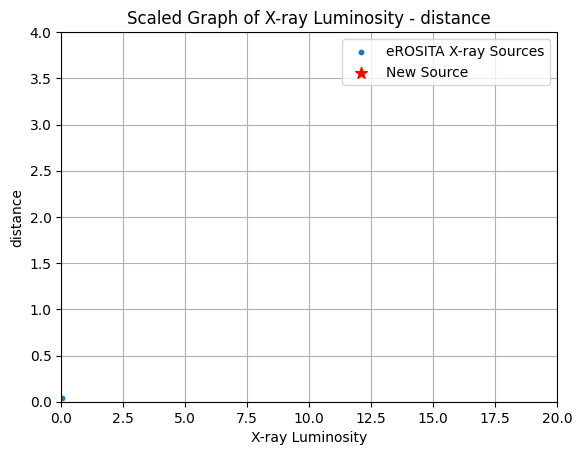

In [ ]:
#Plotting 
plot.scatter(data_1_scaled_clean[0],data_1_scaled_clean[1],s = 10,label = "eROSITA X-ray Sources")
plot.scatter(source_scaled[0][0],source_scaled[0][1],marker = "*", color = "red" , s = 75, label = "New Source")
plot.xlabel("X-ray Luminosity")
plot.ylabel("distance")
plot.title("Scaled Graph of X-ray Luminosity - distance")
plot.xlim(0,20)
plot.ylim(0,4)
plot.grid()
plot.legend()
plot.show()

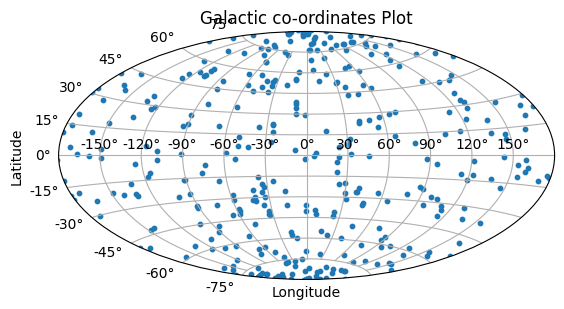

In [90]:
#Plotting Galactic coordinates
figure = plot.figure()
ax = figure.add_subplot(projection="aitoff")
plot.scatter(galac_coord_LG,galac_coord_LA, s = 10, label = "eROSITA X-ray Sources")
plot.plot(208,-19.1, color = "red", marker="*")
plot.title("Galactic co-ordinates Plot")
plot.xlabel("Longitude")
plot.ylabel("Latitude")
plot.grid()

In [ ]:
float(target_sr_[2][0])

2.0

In [104]:
data_1

array([[-0.94505225,  0.        ,  0.        ],
       [-0.71992796,  1.91124552,  0.98334922],
       [ 1.39555436,  0.        ,  0.        ],
       ...,
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.78087381,  0.        ,  0.        ]])

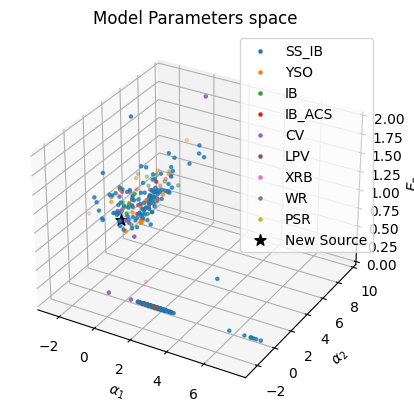

In [156]:
#Plot
label = [0,1,2,3,4,5,6,7,8]
grouped_data = {label: data_1[target_sr_1 == label] for label in label}
fig = plot.figure()
ax = plot.axes(projection = "3d")


for label, points in grouped_data.items():
    a1, a2, Ep = points[:,0], points[:,1], points[:,2]
    ax.scatter(a1, a2, Ep, s=5, label=class_1[label])
    
    ax.set_zlim(0,2)
    
    ax.set_ylabel(r"$\alpha_2$")
    ax.set_xlabel(r"$\alpha_1$")
    ax.set_zlabel(r"$E_p$")
    ax.set_title("Model Parameters space")
    ax.legend()
ax.scatter(a1_,a2_,Ep_,label = "New Source",marker = "*",color = "black", s = 70)
ax.legend()

In [115]:
print("data_1 shape:", data_1.shape)
print("target_sr_1 shape:", target_sr_1.shape)

data_1 shape: (619, 3)
target_sr_1 shape: (619,)


In [ ]:
a1, a2, Ep = points[:, 0], points[:, 1], points[:, 2]
    ax.scatter(a1, a2, Ep, s=10, label=class_1.get(label, f"Class {label}"))